# Fashion Image Classification on Maryland Polyvore: First Scenario - CNN from Scratch

## Authors
- Kamand Kalashi
- Sajjad Saed


## Project Overview
In this project, we embark on the journey of building a Convolutional Neural Network (CNN) from scratch, focusing on image classification within the fashion domain. Our primary objective is to classify images based on distinct categories derived from the Maryland Fashion Dataset, which is publicly available [here](https://github.com/AemikaChow/AiDLab-fAshIon-Data/blob/main/Datasets/cleaned-maryland.md).

### Dataset
The dataset consists of a diverse collection of fashion images, each categorized into predefined classes. This diversity allows the CNN to learn and distinguish various fashion items based on their visual features.

### Methodology
#### 1. Environment Setup
We initiate the project by importing essential libraries, including TensorFlow and Keras, which are pivotal for building and training the CNN. Libraries for data manipulation, image processing, and visualization are also included to streamline the workflow.

#### 2. Data Preparation
Data preparation is a crucial step in any machine learning project. We mount Google Drive to access our dataset efficiently. Then, we retrieve class names from the dataset, providing an overview of the categories we will work with. 

We display sample images from each class to visualize the dataset's variety. This step helps in understanding the data and setting expectations for model performance.

#### 3. Image Preprocessing
To ensure the CNN can process images effectively, we resize all images to a consistent shape (128x128 pixels). Each image is converted to grayscale, and the pixel values are normalized to a range of [0, 1]. This normalization is vital for accelerating convergence during training.

#### 4. Data Augmentation
To enhance model robustness and reduce overfitting, we apply data augmentation techniques. These techniques include random rotations, shifts, and flips, artificially increasing the diversity of the training dataset.

#### 5. Model Architecture
We design a custom CNN architecture, employing layers like convolutional, pooling, dropout, and dense layers. The architecture is structured to progressively extract features, reduce dimensionality, and ultimately classify the images into their respective categories. We include dropout layers to mitigate overfitting and enhance generalization.

#### 6. Model Compilation
The model is compiled with categorical crossentropy as the loss function and Adam as the optimizer. We monitor accuracy as the performance metric, which provides insights into the model's classification capabilities.

#### 7. Model Training
The model is trained using the training dataset, while the validation dataset allows us to monitor performance and avoid overfitting. We leverage callbacks like EarlyStopping and ReduceLROnPlateau to optimize training efficiency.

#### 8. Model Evaluation
After training, we evaluate the model on a separate test set to assess its performance. We calculate metrics such as accuracy, loss, and a classification report that provides precision, recall, and F1 scores for each class. Additionally, a confusion matrix is visualized to identify misclassifications, aiding in further model refinement.

### Training Sessions
In the repository, we have provided two files from different training sessions. The first training session yielded an accuracy of **84%**, while the second achieved an accuracy of **79%**. Notably, the model with **79% accuracy** exhibited a more stable training and validation accuracy and loss compared to the **84% model**. This observation suggests that while the first model achieved higher accuracy, the second model may generalize better due to its stability during training.

### Conclusion
This project illustrates the complete workflow of building a CNN from scratch for image classification. By following this structured approach, we aim to develop a robust model capable of accurately classifying fashion images. The insights gained from the evaluation phase will guide future improvements and iterations of the model.


## Step 1: Import Required Libraries
- Import the necessary libraries for feature extraction, image processing, and model training.

In [1]:
# Importing required libraries
# Feature extraction and feature selection
import numpy as np
import pandas as pd

# imqage processing and visualization
import cv2
import tqdm as tqdm
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Data training and create cnn model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, MaxPooling2D, GlobalAveragePooling2D, Flatten
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, TensorBoard, ModelCheckpoint
import itertools
import ipywidgets as widgets

## Step 2: Mount Google Drive
- Mount Google Drive to access the dataset stored in it.

In [2]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 3: Dataset Exploration

In [3]:
dataset_path = '/content/drive/MyDrive/Polyvore/'

### 3.1 Get Class Names
- Retrieve the class names and the count of images in each class from the dataset.

In [4]:
# return dataset class names and count
def get_class_names(data_path):
    class_names = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
    return class_names

In [5]:
# get dataset class names and count
class_names = get_class_names(dataset_path)
print("Dataset classes count:", len(class_names)," and names are:", class_names)

Dataset classes count: 8  and names are: ['bag', 'dress', 'eyewear', 'hats', 'neckwear', 'pants', 'shoes', 'watches']


### 3.2 Sample Image Display
- Display a sample image from each class for a quick visual understanding of the dataset.

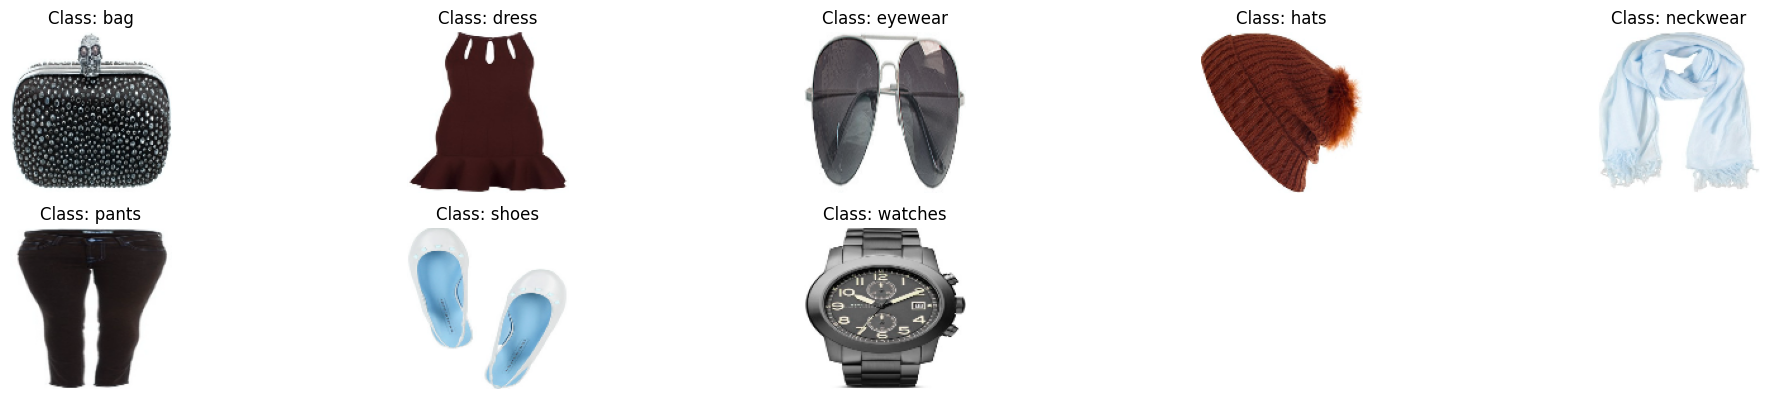

In [6]:
# select first image from each class
images = []
for i in class_names:
  path=os.path.join(dataset_path,i)
  label = class_names.index(i)
  img=os.listdir(path)[0]
  try:
    img_arr=cv2.imread(os.path.join(path,img))
    new_img_arr = cv2.resize(img_arr, (128, 128))
    images.append([new_img_arr, label])
  except Exception as e:
    pass

# Display a sample image of each class
rows_num = 2
cols_num = 5
images_num = 8
plt.figure(figsize=(4*cols_num,4*rows_num))
for i in range(images_num):
  plt.subplot(2*rows_num,2*cols_num,2*i+1)
  plt.imshow(images[i][0])
  plt.title(f"Class: {class_names[images[i][1]]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

### 3.3 Resize Images
- Resize all images to a uniform size of 128x128 pixels for consistency.

In [7]:
# to resizing all data to same size (128*128)
image_size = 128
# Array to store all images with its label
all_data = []
image_count = []
count = 0

# For each index in the list of classes (class_names), by using method join with arguments dataset_path and i,
# reads all images of these classes and after resizing to 12*128, store the image with its label in all_data array
for i in class_names:
  path=os.path.join(dataset_path,i)
  class_label = class_names.index(i)
  for image in tqdm.tqdm(os.listdir(path)):
    try:
      image_array=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
      new_image_array = cv2.resize(image_array, (image_size, image_size))
      all_data.append([new_image_array, class_label])
      # plt.imshow(new_image_array)
      # plt.show()
      # break
      if os.path.isfile(os.path.join(path,image)):
        count += 1
    except Exception as e:
      pass
  image_count.append([count, class_names[class_label]])
  count = 0
image_count

100%|██████████| 786/786 [00:07<00:00, 104.04it/s]


[[786, 'bag'],
 [800, 'dress'],
 [780, 'eyewear'],
 [782, 'hats'],
 [791, 'neckwear'],
 [793, 'pants'],
 [789, 'shoes'],
 [786, 'watches']]

In [8]:
print(len(all_data))

6307


## Step 4: Data Preparation
### 4.1 Split Data
- Split the dataset into training, validation, and test sets to evaluate the model's performance accurately.

In [18]:
# split images and labels to X and Y arays
# images
X = []
# labels
Y = []
for i, j in all_data:
  X.append(i)
  Y.append(j)
# reshape images to 128*128 and channel 1 (black & white )
X = np.array(X).reshape(-1, image_size, image_size)
print(X.shape)
# to normalize
X = X/255
X = X.reshape(-1, 128, 128, 1)
print(X.shape)

# Converts class vector (Y) to binary class matrix --> one hot encoding
y_categorical = to_categorical(Y,num_classes = 8)

(6307, 128, 128)
(6307, 128, 128, 1)


In [19]:
# split the all_data into 80% train data and 20% test data by random state 42
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size = 0.2, random_state = 42 , shuffle = True)
# split 15% of the train data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 42, shuffle = True)

In [20]:
print('all data:', len(all_data))
print('total train data:', len(X_train) , 'and shape:', X_train.shape)
print('total validation data:', len(X_val), 'and shape:', X_val.shape)
print('total test data:', len(X_test), 'and shape:', X_test.shape)

all data: 6307
total train data: 4288 and shape: (4288, 128, 128, 1)
total validation data: 757 and shape: (757, 128, 128, 1)
total test data: 1262 and shape: (1262, 128, 128, 1)


In [21]:
X_train.shape

(4288, 128, 128, 1)

### 4.2 Data Augmentation
- Apply data augmentation techniques to the training set to reduce overfitting and enhance model generalization.

In [22]:
# Data Preprocessing
# Data augmentation to reduce overfitting
train_generator =ImageDataGenerator(
                                      rotation_range=35,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      featurewise_std_normalization=False,
                                      samplewise_center=False,
                                      samplewise_std_normalization=False,
                                      fill_mode='nearest'
  # rotation_range=30,
  # width_shift_range=0.2,
  # height_shift_range=0.2,
  # horizontal_flip=True,
  # shear_range=0.2,
  # zoom_range=0.3,
                                      )

## Step 5: Design CNN Architecture
- Define the architecture of the CNN model, including convolutional layers, pooling layers, dropout layers, and fully connected layers.

In [23]:
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers
# My CNN architecture
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (image_size, image_size, 1)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
# model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
# model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))  # Dropout to reduce overfitting
# model.add(Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 64)       

## Step 6: Compile the Model
- Compile the CNN model with an appropriate loss function (categorical crossentropy) and optimizer (Adam).

In [24]:
# Configures the model for training.
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.00128, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-7), metrics = ['accuracy'])

In [25]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 4, verbose = 1, mode = 'auto', factor = 0.3, min_lr = 0.000001)
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("DL_project_CNN_from_scratch4.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 4, mode = 'max')

## Step 7: Train the Model
- Train the CNN model using the training data and validate it with the validation set. Utilize callbacks to monitor performance and adjust learning rates.

In [26]:
# Train the model with data augmentation
train_generator.fit(X_train)
mycnn_history4 = model.fit_generator(train_generator.flow(X_train, y_train, batch_size = 32),
                              epochs = 50,
                              validation_data = (X_val, y_val),
                              steps_per_epoch = X_train.shape[0] // 32,
                              # validation_steps=X_val.shape[0] // 32,
                              callbacks = [reduce_learning_rate, tensorboard, checkpoint])

Epoch 1/50


<ipython-input-26-23a17c402013>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mycnn_history4 = model.fit_generator(train_generator.flow(X_train, y_train, batch_size = 32),


134/134 [==============================] - ETA: 0s - loss: 2.2773 - accuracy: 0.1136
Epoch 1: val_accuracy improved from -inf to 0.13474, saving model to DL_project_CNN_from_scratch4.h5
134/134 [==============================] - 12s 71ms/step - loss: 2.2773 - accuracy: 0.1136 - val_loss: 2.0796 - val_accuracy: 0.1347 - lr: 0.0010
Epoch 2/50
133/134 [============================>.] - ETA: 0s - loss: 2.0795 - accuracy: 0.1311
Epoch 2: val_accuracy did not improve from 0.13474
134/134 [==============================] - 7s 54ms/step - loss: 2.0795 - accuracy: 0.1306 - val_loss: 2.0801 - val_accuracy: 0.1057 - lr: 0.0010
Epoch 3/50
133/134 [============================>.] - ETA: 0s - loss: 2.0795 - accuracy: 0.1238
Epoch 3: val_accuracy did not improve from 0.13474
134/134 [==============================] - 9s 69ms/step - loss: 2.0795 - accuracy: 0.1236 - val_loss: 2.0803 - val_accuracy: 0.1057 - lr: 0.0010
Epoch 4/50
134/134 [==============================] - ETA: 0s - loss: 2.0796 - accur

In [27]:
# Save the Model
model.save('DL_project_CNN_from_scratch4.h5')

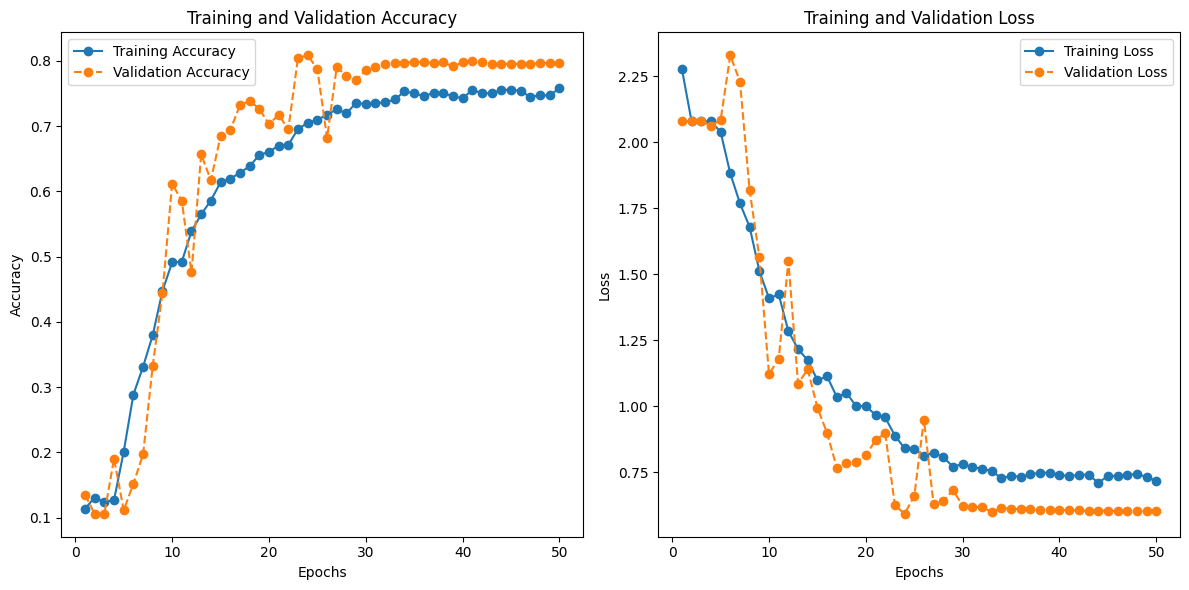

In [28]:
import matplotlib.pyplot as plt

# Displaying curves of loss and accuracy during training
acc = mycnn_history4.history['accuracy']
val_acc = mycnn_history4.history['val_accuracy']
loss = mycnn_history4.history['loss']
val_loss = mycnn_history4.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot accuracy on the left side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o', linestyle='dashed')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss on the right side
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', linestyle='dashed')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter( y=mycnn_history4.history['val_loss'], mode="lines+markers",
            marker=dict(
                symbol="circle",
                size=9,
                angleref="previous",
            ), name="Validation_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=mycnn_history4.history['loss'], mode="lines+markers",
            marker=dict(
                symbol="circle",
                size=9,
                angleref="previous",
            ), name="Training_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=mycnn_history4.history['val_accuracy'], mode="lines+markers",
            marker=dict(
                symbol="circle",
                size=9,
                angleref="previous",
            ), name="Validation_accuracy"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter( y=mycnn_history4.history['accuracy'], mode="lines+markers",
            marker=dict(
                symbol="circle",
                size=9,
                angleref="previous",
            ), name="Training_accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of CNN Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Loss</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Accuracy</b>", secondary_y=True)

fig.show()

## Step 8: Evaluate the Model
### 8.1 Model Evaluation
- Evaluate the model's performance on the test set, calculating accuracy and loss.

In [30]:
# Evaluate the model  --> first method
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_real = np.argmax(y_test, axis = 1)

# display result of evaluate the model  --> first method
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy: {:.2f}%".format(test_acc * 100))
print(f"Test loss: {test_loss: 0.2f}")

# display result of evaluate the model  --> first method
accuracy = np.sum(y_pred == y_real) / len(y_test)
print("Test accuracy: {:.2f}%".format(accuracy * 100))

40/40 [==============================] - 0s 6ms/step - loss: 0.5611 - accuracy: 0.8193
Test accuracy: 81.93%
Test loss:  0.56
Test accuracy: 81.93%


In [31]:
print(classification_report(y_real, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         bag       0.74      0.87      0.80       178
       dress       0.72      0.86      0.78       160
     eyewear       0.96      0.96      0.96       139
        hats       0.75      0.89      0.81       152
    neckwear       0.97      0.60      0.74       167
       pants       0.95      0.95      0.95       147
       shoes       0.86      0.57      0.69       168
     watches       0.77      0.91      0.83       151

    accuracy                           0.82      1262
   macro avg       0.84      0.83      0.82      1262
weighted avg       0.84      0.82      0.82      1262



### 8.2 Confusion Matrix
- Create and display a confusion matrix to visualize the model's classification performance across different classes.

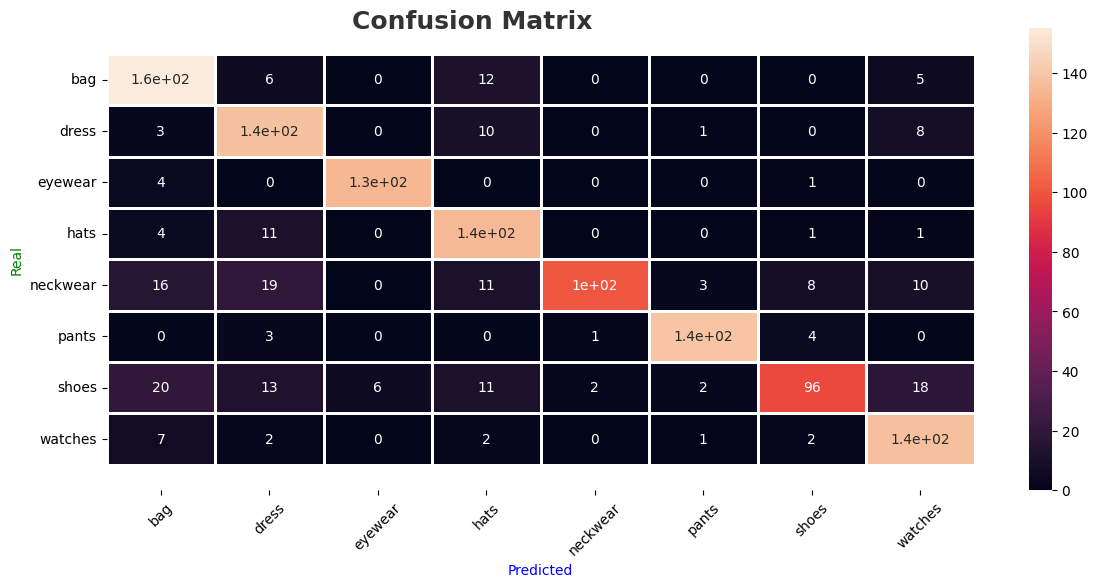

In [32]:
# display confusion matrix
fig, ax = plt.subplots(1,1,figsize=(14, 6))
sns.heatmap(confusion_matrix(y_real, y_pred), xticklabels=class_names, yticklabels=class_names,annot=True, linewidths=2, linecolor='white', ax=ax)
fig.text(s="Confusion Matrix", size=18,fontweight='bold', fontname='DejaVu Sans', y=0.88,x=0.30,alpha=0.8)
bottom, top = plt.ylim()
plt.ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted', color='blue')
plt.ylabel('Real', color='green')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
# plt.show()

## Conclusion
- Summarize the results, discussing the model's effectiveness in classifying images and suggesting future improvements or experiments.